## Boston House Price Prediction
This project involves predicting the prices of houses in Boston using a regression-based machine learning approach. The dataset used for this prediction is the well-known Boston House Price dataset from kaggle (Which also in sklearn datasets). To get more accurate predictions, XGBoost regression algorithm is used due to its efficiency and performance in handling regression tasks.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Importing and Processing

In [42]:
import sklearn.datasets
dataset = sklearn.datasets.load_boston()

In [7]:
# Dataset array to pandas dataframe
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# add price column to the dataframe
dataframe['price'] = house_price_dataset.target
print(dataframe.shape)
dataframe.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# check whether missing values are there
dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

Split the data and Target to X and Y

In [20]:
X = dataframe.drop(['price'], axis=1)
Y = dataframe['price']

Training data and Test data Speration

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training using XGBoost Regressor

In [26]:
from xgboost import XGBRegressor
# load the model
model = XGBRegressor()

In [27]:
# training the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction on Train Data

In [35]:
# accuracy for prediction on training data
Y_pred_train = model.predict(X_train)

Evaluate the Performance on Training Data

In [36]:
from sklearn import metrics
# R squared error
score_train = metrics.r2_score(Y_train, Y_pred_train)

print("R squared error : ", score_train)

R squared error :  0.9999980039471451


Visualize the actual Prices and predicted prices in training dataset

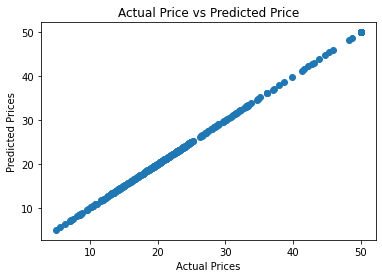

In [40]:
plt.scatter(Y_train, Y_pred_train)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data

In [38]:
# accuracy for prediction on test data
Y_pred_test = model.predict(X_test)

In [39]:
# R squared error
score_test = metrics.r2_score(Y_test, Y_pred_test)

print("R squared error : ", score_test)

R squared error :  0.9051721149855378


Visualize the actual Prices and predicted  prices in Testing dataset

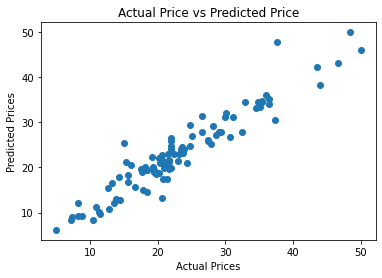

In [41]:
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()